In [1]:
#!pip install scikit-learn
#!pip install opencv-python

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Define the directory path containing the images
# batch size and image size are set randomly
data_directory = "/Users/lukasiwan/NeueFische/Repositories/Hydroponics/data/original_dataset"
batch_size = 32
image_size = (64,64)

In [4]:
# Load and preprocess the data using tf.keras.preprocessing.image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 281 files belonging to 4 classes.
Using 225 files for training.
Found 281 files belonging to 4 classes.
Using 56 files for validation.


In [5]:
# Print the class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['deficiency_nitrogen', 'deficiency_phosphorus', 'deficiency_potassium', 'healthy']


In [6]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [9]:
# Train the model
history = model.fit(data, validation_data=val_data, epochs=40)

Epoch 1/40


2023-07-12 22:27:58.345164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:00.582366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:00.585291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:00.954042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 26s - loss: 45.2474 - accuracy: 0.2188

2023-07-12 22:28:01.200490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 5s 122ms/step - loss: 65.2426 - accuracy: 0.2356 - val_loss: 7.7221 - val_accuracy: 0.2321
Epoch 2/40


2023-07-12 22:28:02.124134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:02.568943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:04.420803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:04.440166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:04.915839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:05.084643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 110ms/step - loss: 4.3472 - accuracy: 0.2622 - val_loss: 1.3376 - val_accuracy: 0.4643
Epoch 3/40


2023-07-12 22:28:05.930860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:06.414791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:08.040486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:08.086127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:08.338868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:08.485072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 145ms/step - loss: 1.3028 - accuracy: 0.4356 - val_loss: 2.1843 - val_accuracy: 0.3214
Epoch 4/40


2023-07-12 22:28:09.543319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:10.069180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:11.857098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:11.898666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:12.247128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 2.2189 - accuracy: 0.4062

2023-07-12 22:28:12.473745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 124ms/step - loss: 1.5007 - accuracy: 0.4756 - val_loss: 1.2109 - val_accuracy: 0.4107
Epoch 5/40


2023-07-12 22:28:13.353497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:13.876484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:15.223242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:15.227012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:15.769607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:16.063537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 133ms/step - loss: 1.0826 - accuracy: 0.5422 - val_loss: 1.0522 - val_accuracy: 0.5179
Epoch 6/40


2023-07-12 22:28:17.094628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:17.602734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:19.025146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:19.025991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:19.293805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:19.705948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 157ms/step - loss: 0.7962 - accuracy: 0.6578 - val_loss: 1.6302 - val_accuracy: 0.4821
Epoch 7/40


2023-07-12 22:28:20.904586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:21.536553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:23.014777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:23.019368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:23.246951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:23.387902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.8318 - accuracy: 0.6875

2023-07-12 22:28:24.467796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 169ms/step - loss: 0.8315 - accuracy: 0.6844 - val_loss: 1.0179 - val_accuracy: 0.5536
Epoch 8/40


2023-07-12 22:28:25.311323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:26.716483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:26.724006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:27.065003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:27.239750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 3s 82ms/step - loss: 0.6468 - accuracy: 0.7333 - val_loss: 0.9111 - val_accuracy: 0.6250
Epoch 9/40


2023-07-12 22:28:27.797953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:28.513380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:30.196071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:30.203550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:30.621078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:30.794198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 101ms/step - loss: 0.4871 - accuracy: 0.8133 - val_loss: 1.3128 - val_accuracy: 0.5714
Epoch 10/40


2023-07-12 22:28:31.547150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:31.964315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:33.959366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:33.978216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:34.255464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:34.435439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 113ms/step - loss: 0.4429 - accuracy: 0.8267 - val_loss: 1.0790 - val_accuracy: 0.6786
Epoch 11/40


2023-07-12 22:28:35.292704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:35.795873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:37.355222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:37.381348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:37.825228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 19s - loss: 0.5402 - accuracy: 0.7812

2023-07-12 22:28:38.089265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 124ms/step - loss: 0.4615 - accuracy: 0.8178 - val_loss: 1.4422 - val_accuracy: 0.6071
Epoch 12/40


2023-07-12 22:28:38.960530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:39.473054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:41.012797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:41.018001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:41.531497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 0.5737 - accuracy: 0.7500

2023-07-12 22:28:41.907159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 123ms/step - loss: 0.6604 - accuracy: 0.7289 - val_loss: 2.2945 - val_accuracy: 0.3929
Epoch 13/40


2023-07-12 22:28:42.792691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:43.388784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:44.589166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:44.599329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:45.162536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:45.473434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 142ms/step - loss: 0.5244 - accuracy: 0.8044 - val_loss: 1.3387 - val_accuracy: 0.6071
Epoch 14/40


2023-07-12 22:28:46.616308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:47.187444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:48.576560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:48.578759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:48.806015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:48.967733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.2781 - accuracy: 0.8973

2023-07-12 22:28:50.183255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 183ms/step - loss: 0.2769 - accuracy: 0.8978 - val_loss: 1.1015 - val_accuracy: 0.6786
Epoch 15/40


2023-07-12 22:28:50.917672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:52.344755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:52.401242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:52.678511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:52.816920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.1629 - accuracy: 0.9420

2023-07-12 22:28:54.264390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 238ms/step - loss: 0.1631 - accuracy: 0.9422 - val_loss: 1.5630 - val_accuracy: 0.6429
Epoch 16/40


2023-07-12 22:28:55.258882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:57.039556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:57.068961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:57.338618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:28:57.488142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 130ms/step - loss: 0.1638 - accuracy: 0.9467 - val_loss: 1.5625 - val_accuracy: 0.6607


2023-07-12 22:28:58.333589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


Epoch 17/40


2023-07-12 22:28:59.052101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:00.691786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:00.717531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:01.012471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 0.0962 - accuracy: 1.0000

2023-07-12 22:29:01.273759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 3s 83ms/step - loss: 0.0952 - accuracy: 0.9822 - val_loss: 1.0979 - val_accuracy: 0.6786
Epoch 18/40


2023-07-12 22:29:01.884085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:02.594007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:04.433897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:04.452158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:04.801074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:04.975657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 103ms/step - loss: 0.0751 - accuracy: 0.9911 - val_loss: 1.2096 - val_accuracy: 0.6607
Epoch 19/40


2023-07-12 22:29:05.780840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:06.194084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:08.094925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:08.111126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:08.463727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:08.646863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 115ms/step - loss: 0.0476 - accuracy: 0.9911 - val_loss: 1.2450 - val_accuracy: 0.6786
Epoch 20/40


2023-07-12 22:29:09.512736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:10.024718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:11.634203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:11.675801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:12.150012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 19s - loss: 0.0510 - accuracy: 0.9688

2023-07-12 22:29:12.366827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 116ms/step - loss: 0.0297 - accuracy: 0.9956 - val_loss: 1.2903 - val_accuracy: 0.6429
Epoch 21/40


2023-07-12 22:29:13.148249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:13.700317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:14.990038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:15.067388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:15.587791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 19s - loss: 0.0191 - accuracy: 1.0000

2023-07-12 22:29:15.982845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 125ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.4994 - val_accuracy: 0.6607
Epoch 22/40


2023-07-12 22:29:16.908026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:17.561039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:18.768778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:18.787004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:19.032577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 17s - loss: 0.0092 - accuracy: 1.0000

2023-07-12 22:29:19.400149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 161ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.5873 - val_accuracy: 0.6429
Epoch 23/40


2023-07-12 22:29:20.531246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:21.150656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:22.628620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:22.644896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:22.860243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:22.996854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000

2023-07-12 22:29:24.016881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 160ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.7457 - val_accuracy: 0.6607
Epoch 24/40


2023-07-12 22:29:24.857571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:26.361188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:26.361516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:26.711877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:26.889385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9911

2023-07-12 22:29:27.529890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 119ms/step - loss: 0.0201 - accuracy: 0.9911 - val_loss: 2.0129 - val_accuracy: 0.6964
Epoch 25/40


2023-07-12 22:29:28.382855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:30.073493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:30.096146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:30.450290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 21s - loss: 0.0077 - accuracy: 1.0000

2023-07-12 22:29:30.696648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 90ms/step - loss: 0.0239 - accuracy: 0.9956 - val_loss: 1.4546 - val_accuracy: 0.7321
Epoch 26/40


2023-07-12 22:29:31.401764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:31.830783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:33.731739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:33.746808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:34.118520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:34.268757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 110ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.4370 - val_accuracy: 0.7143
Epoch 27/40


2023-07-12 22:29:35.173716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:35.612123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:37.470236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:37.474863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:37.915192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 21s - loss: 0.0063 - accuracy: 1.0000

2023-07-12 22:29:38.145136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 118ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4795 - val_accuracy: 0.6964
Epoch 28/40


2023-07-12 22:29:39.009304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:39.608880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:41.233424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:41.251205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:41.813678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 21s - loss: 0.0048 - accuracy: 1.0000

2023-07-12 22:29:42.075149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

2023-07-12 22:29:42.976167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 135ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.4510 - val_accuracy: 0.7321
Epoch 29/40


2023-07-12 22:29:43.555843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:45.044328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:45.074632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:45.630318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 0.0031 - accuracy: 1.0000

2023-07-12 22:29:45.945231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 119ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.4813 - val_accuracy: 0.7500
Epoch 30/40


2023-07-12 22:29:46.791605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:47.385502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:48.622714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:48.659989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:49.096603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:49.521563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 149ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.5619 - val_accuracy: 0.7321
Epoch 31/40


2023-07-12 22:29:50.596585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:51.176593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:52.584508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:52.593305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:52.812812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:52.949898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

2023-07-12 22:29:54.044480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 168ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.5898 - val_accuracy: 0.7143
Epoch 32/40


2023-07-12 22:29:54.809205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:56.387449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:56.419383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:56.760864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:29:56.913541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000  

2023-07-12 22:29:57.654558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 125ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.6651 - val_accuracy: 0.7321
Epoch 33/40


2023-07-12 22:29:58.522897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:00.222684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:00.226871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:00.555005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 0.0013 - accuracy: 1.0000

2023-07-12 22:30:00.787934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


7/8 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000    

2023-07-12 22:30:01.418753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 108ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.7213 - val_accuracy: 0.7143
Epoch 34/40


2023-07-12 22:30:02.310086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:04.079270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:04.099802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:04.404117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:04.584312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 80ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.6786 - val_accuracy: 0.6964
Epoch 35/40


2023-07-12 22:30:05.283641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:05.864288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:07.717981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:07.747792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:08.138970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:08.335321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 114ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.7189 - val_accuracy: 0.6786
Epoch 36/40


2023-07-12 22:30:09.184054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:09.582637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:11.538842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:11.565002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:11.923948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/8 [======>.......................] - ETA: 0s - loss: 5.5672e-04 - accuracy: 1.0000 

2023-07-12 22:30:12.148561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 115ms/step - loss: 8.1625e-04 - accuracy: 1.0000 - val_loss: 1.7871 - val_accuracy: 0.6429
Epoch 37/40


2023-07-12 22:30:12.952503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:13.429299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:15.114452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:15.164459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:15.617294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/8 [==>...........................] - ETA: 20s - loss: 2.7965e-04 - accuracy: 1.0000

2023-07-12 22:30:15.869073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 4s 124ms/step - loss: 6.6144e-04 - accuracy: 1.0000 - val_loss: 1.7611 - val_accuracy: 0.6786
Epoch 38/40


2023-07-12 22:30:16.752668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:17.309436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:18.591481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:18.612707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:19.044357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2/8 [======>.......................] - ETA: 0s - loss: 1.9667e-04 - accuracy: 1.0000 

2023-07-12 22:30:19.294049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 3s 127ms/step - loss: 5.4856e-04 - accuracy: 1.0000 - val_loss: 1.7040 - val_accuracy: 0.7143
Epoch 39/40


2023-07-12 22:30:20.165478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:20.703399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:21.841545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:21.842716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:22.086023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:22.373417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 3s 144ms/step - loss: 4.8928e-04 - accuracy: 1.0000 - val_loss: 1.6953 - val_accuracy: 0.7143
Epoch 40/40


2023-07-12 22:30:23.504606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:24.154949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:25.632288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:25.632686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:25.980080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-07-12 22:30:26.159182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/8 [==============================] - 3s 95ms/step - loss: 4.2472e-04 - accuracy: 1.0000 - val_loss: 1.7129 - val_accuracy: 0.7143


2023-07-12 22:30:26.906634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [10]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

2/2 [==============================] - 0s 17ms/step - loss: 1.7129 - accuracy: 0.7143
Validation Loss: 1.7129029035568237
Validation Accuracy: 0.7142857313156128


2023-07-12 22:30:27.199451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [11]:
# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

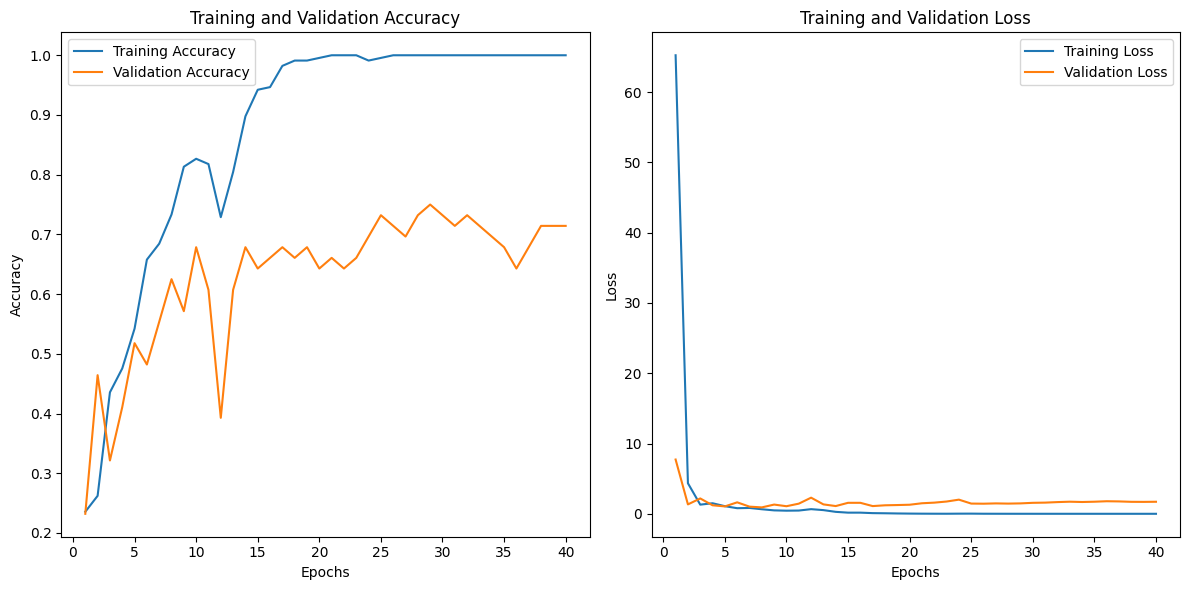

In [12]:
# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create line plots
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()